In [49]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import neattext.functions as nfx
import emoji
import advertools as adv
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
april=pd.read_csv('APRILFINALTWEET(RAW).csv')

In [52]:
april.columns

Index(['Unnamed: 0', 'created_at', 'username', 'tweet', 'language',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

In [53]:
april.drop(['Unnamed: 0'],axis=1,inplace=True)

In [54]:
april.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [55]:
april.shape

(3980, 7)

In [56]:
duplicates = april[april.duplicated()]
duplicates.shape  

(485, 7)

In [57]:
april=april.drop_duplicates(keep='first')
april.shape

(3495, 7)

In [58]:
april['language'].unique()

array(['und', 'in', 'th', 'en', 'hi', 'et', 'ar', 'mr', 'tl', 'zh', 'it',
       'tr', 'ca', 'es', 'ja', 'ur', 'ne', 'bn', 'de', 'ta', 'lo', 'si',
       'lt', 'gu', 'pl', 'pt', 'sl', 'ro', 'fi', 'ht', 'vi', 'or', 'fa',
       'te', 'ml', 'no', 'fr', 'cs'], dtype=object)

In [59]:
april['language'].value_counts()

en     2624
hi      331
in      151
und     130
tl       47
mr       34
th       23
et       21
ur       19
gu       19
bn       12
ca       11
es        9
ar        8
or        8
ro        7
si        6
tr        5
pt        3
ja        3
ht        3
it        2
fi        2
de        2
zh        2
ta        1
no        1
lo        1
fr        1
ml        1
lt        1
cs        1
sl        1
te        1
pl        1
ne        1
vi        1
fa        1
Name: language, dtype: int64

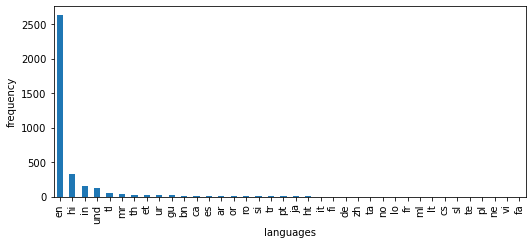

In [60]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=april['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

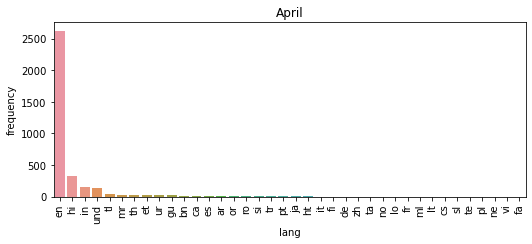

In [63]:
import seaborn as sns
lang=april['language'].value_counts().rename_axis('lang').reset_index(name='frequency')
ax = sns.barplot(x="lang", y="frequency", data=lang)
plt.title("April")
plt.xticks(rotation=90)
plt.show()

In [64]:
lang.shape

(38, 2)

In [12]:
for i in april['language']:
    index_names = april[april['language']!='en' ].index
    april.drop(index_names, inplace = True)

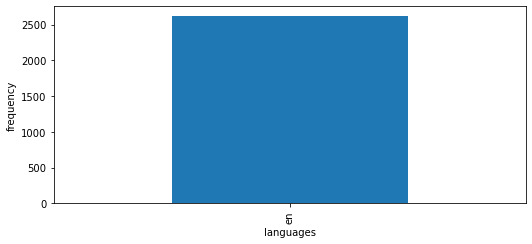

In [13]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=april['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

In [14]:
april.shape

(2624, 7)

In [15]:
duplicates = april[april.duplicated()]
duplicates.shape  

(0, 7)

In [16]:
AprilTweet=april[['tweet','language']]

In [17]:
AprilTweet=AprilTweet.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [18]:
AprilTweet.drop(['index'],axis=1,inplace=True)

In [19]:
AprilTweet.to_csv("AprilTweet.csv")

In [20]:
AprilTweet['hastags']=np.nan

In [21]:

def extract_hastags(text,i=0):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[0:])
    AprilTweet['hastags'][i]=hashtag_list

In [22]:
AprilTweet['tweet'][20]

'Temporarily closed due to pandemic #Covid_19  https://t.co/l71WUDF1WI'

In [23]:
extract_hastags(AprilTweet['tweet'][20],20)

<ipython-input-21-0d5c3b9ef41d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AprilTweet['hastags'][i]=hashtag_list
c:\Users\AYUSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
for i in range(0,2624):
    text=AprilTweet['tweet'][i]
    extract_hastags(text,i)


In [25]:
AprilTweet['hastags']

0                                                      []
1          [#Sipgrab, #UnitingPeopleWithThePossibilities]
2       [#sissyclit, #ExposedSissySlut, #sissy, #faggot.]
3                                                      []
4                                                      []
                              ...                        
2619    [#Covid_19, #PohelaBoishak, #WestBengalElectio...
2620                                 [#SaveLives4Sushant]
2621                               [#CoronaRiskInPrisons]
2622                                                   []
2623                                                   []
Name: hastags, Length: 2624, dtype: object

In [26]:
AprilTweet['attherate']=np.nan

In [27]:
def extract_at_the_rate(text,i=0):
    list1= []
    for word in text.split():
        if word[0] == '@':
            list1.append(word[0:])
    AprilTweet['attherate'][i]=list1

In [28]:
AprilTweet['tweet'][3]

'@Dublin_Called @NFitzPsychology Thanks, Orla! The pandemic has made it tougher. My sis (in Canada) &amp; hubster can\'t even fly over to help out. Under normal conditions (we\'ll need to redefine "normal" post-Covid) we could take turns. However tough, I have no regrets caring for my mum ❤️ (really miss Dublin tho🍀)'

In [29]:
extract_at_the_rate(AprilTweet['tweet'][3],3)

<ipython-input-27-8a8d2d1262db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AprilTweet['attherate'][i]=list1


In [30]:
for i in range(0,2624):
    text=AprilTweet['tweet'][i]
    extract_at_the_rate(text,i)


In [31]:
AprilTweet['attherate']

0       [@HemantSorenJMM, @DCEastSinghbhum, @BannaGupt...
1                                                      []
2                                                      []
3                      [@Dublin_Called, @NFitzPsychology]
4       [@DCFaisalabad, @ImranKhanPTI, @OfficialNcoc, ...
                              ...                        
2619                                        [@AboutIndia]
2620                                                   []
2621                                                   []
2622                                                   []
2623                                     [@LokKalyanSetu]
Name: attherate, Length: 2624, dtype: object

In [32]:
AprilTweet.to_csv('AprilTweet.csv')

In [33]:
AprilTweet['urls']=np.nan

In [34]:
def extract_urls(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0:5] == 'https':
            attherate_list.append(word[0:])
    AprilTweet['urls'][i]=attherate_list

In [35]:
AprilTweet['tweet'][20]

'Temporarily closed due to pandemic #Covid_19  https://t.co/l71WUDF1WI'

In [36]:
extract_urls(AprilTweet['tweet'][20],20)

<ipython-input-34-b5db7d8d2be8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AprilTweet['urls'][i]=attherate_list


In [37]:
for i in range(0,2624):
    text=AprilTweet['tweet'][i]
    extract_urls(text,i)

In [38]:
AprilTweet.to_csv('AprilTweet.csv')

In [39]:
AprilTweet['tokenized_Tweet']=np.nan

In [40]:
def tokenizing(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    AprilTweet['tokenized_Tweet'][i]=token_text

In [41]:
for i in range(0,2624):
    text=AprilTweet['tweet'][i]
    tokenizing(text,i)

<ipython-input-40-9a7b99c740aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AprilTweet['tokenized_Tweet'][i]=token_text


In [42]:
AprilTweet['tokenized_Tweet']

0       [COVID, infection, leads, to, clousure, of, tw...
1       [UK, 's, Glastonbury, Festival, cinemas, museu...
2       [These, covid, lockdowns, make, me, desperate,...
3       [Dublin_Called, NFitzPsychology, Thanks, Orla,...
4       [Please, take, strict, action, against, the, D...
                              ...                        
2619    [Covid_19, might, not, be, such, a, bad, time,...
2620    [Here, I, 'm, requesting, each, and, every, wa...
2621    [Covid-19, is, a, pandemic, and, Corona, patie...
2622    [Covid-19, news, Corona, infection, may, incre...
2623                        [Replying, to, LokKalyanSetu]
Name: tokenized_Tweet, Length: 2624, dtype: object

In [43]:
AprilTweet.to_csv('AprilTweet.csv')

In [44]:
AprilTweet['filteredToken']=np.nan

In [45]:
text_set=set(AprilTweet['tokenized_Tweet'][0])
stop_set=set(stopwords.words("english"))
AprilTweet['filteredToken'][0]=list(text_set-stop_set)

<ipython-input-45-7ca931b629db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AprilTweet['filteredToken'][0]=list(text_set-stop_set)


In [46]:
stop_set=set(stopwords.words("english"))
for i in range(0,1698):
    text_set=set(AprilTweet['tokenized_Tweet'][i])
    AprilTweet['filteredToken'][i]=list(text_set-stop_set)

In [47]:
AprilTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet,filteredToken
0,COVID infection leads to clousure of two Jamsh...,en,[],"[@HemantSorenJMM, @DCEastSinghbhum, @BannaGupt...",[],"[COVID, infection, leads, to, clousure, of, tw...","[two, Jamshedpur, English, BannaGupta76, Andhr..."
1,"UK's Glastonbury Festival, cinemas, museums ge...",en,"[#Sipgrab, #UnitingPeopleWithThePossibilities]",[],[https://t.co/zsvvfaO49b],"[UK, 's, Glastonbury, Festival, cinemas, museu...","[Glastonbury, cash, Festival, UnitingPeopleWit..."
2,These covid lockdowns make me desperate than e...,en,"[#sissyclit, #ExposedSissySlut, #sissy, #faggot.]",[],[https://t.co/RB7Dse2yYF],"[These, covid, lockdowns, make, me, desperate,...","[expose, Please, https, leak, ever, sissyclit,..."
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",en,[],"[@Dublin_Called, @NFitzPsychology]",[],"[Dublin_Called, NFitzPsychology, Thanks, Orla,...","[Dublin_Called, hubster, conditions, take, My,..."
4,Please take strict action against the DPS &amp...,en,[],"[@DCFaisalabad, @ImranKhanPTI, @OfficialNcoc, ...",[],"[Please, take, strict, action, against, the, D...","[opening, lives, take, DCFaisalabad, Please, t..."
...,...,...,...,...,...,...,...
2619,#Covid_19 might not be such a bad time for sho...,en,"[#Covid_19, #PohelaBoishak, #WestBengalElectio...",[@AboutIndia],[],"[Covid_19, might, not, be, such, a, bad, time,...",NaN
2620,Here I'm requesting each and every warrior of ...,en,[#SaveLives4Sushant],[],[],"[Here, I, 'm, requesting, each, and, every, wa...",NaN
2621,Covid-19 is a pandemic and Corona patients in ...,en,[#CoronaRiskInPrisons],[],[],"[Covid-19, is, a, pandemic, and, Corona, patie...",NaN
2622,Covid-19 news: Corona infection may increase a...,en,[],[],[],"[Covid-19, news, Corona, infection, may, incre...",NaN


In [48]:
AprilTweet.to_csv('AprilTweet_(with Emojis and other language within eng sentence).csv')